In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("C:\\Users\\İdris Aydın\\Desktop\\Cost_of_Living_Index_2022.csv")
df

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
...,...,...,...,...,...,...,...,...
134,135,Venezuela,43.20,9.99,27.63,37.34,46.23,15.41
135,136,Vietnam,37.48,13.22,26.11,38.70,19.98,29.38
136,137,Yemen,53.14,6.71,31.38,67.12,24.74,14.41
137,138,Zambia,33.04,9.26,21.90,31.53,22.46,40.33


In [5]:
df = df[['Cost of Living Index', 'Rent Index', 'Groceries Index']]
df

,Cost of Living Index,Rent Index,Groceries Index
0,20.37,2.72,14.92
1,35.50,8.47,29.32
2,26.87,4.59,28.82
3,34.69,7.71,28.17
4,33.89,11.61,27.59
...,...,...,...
134,43.20,9.99,37.34
135,37.48,13.22,38.70
136,53.14,6.71,67.12
137,33.04,9.26,31.53


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = df[['Rent Index', 'Groceries Index']].values
y = df[['Cost of Living Index']].values

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [180]:
from sklearn.preprocessing import MinMaxScaler

In [181]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [182]:
scaler.fit(X_train)

MinMaxScaler()

In [183]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [184]:
import tensorflow as tf

In [185]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [186]:
model = Sequential()

model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse')

In [187]:
model.fit(X_train, y_train, epochs=300) # Modelimizi Eğitiyoruz. (3 Hidden Layer, 5 neuron)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3084.4846  
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3370.1184 
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2973.4185 
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3194.5288 
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3069.0186 
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3124.2585 
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3107.0012 
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3113.5989 
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3141.7405 
Epoch 10/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3272.4263 
Epoch 11/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3237.6340 
Epoch 12/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3162.4314 
Epoch 13/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3302.8320 
Epoch 14/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3154.8010 
Epoch 15/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [188]:
loss = model.history.history['loss']
loss

[3159.610107421875,
 3151.306396484375,
 3144.770263671875,
 3138.517578125,
 3132.11669921875,
 3125.479736328125,
 3118.768798828125,
 3112.21630859375,
 3105.68017578125,
 3099.1376953125,
 3092.42138671875,
 3085.371337890625,
 3078.087646484375,
 3070.5234375,
 3062.62939453125,
 3054.4443359375,
 3045.945556640625,
 3037.16845703125,
 3028.0693359375,
 3018.737548828125,
 3009.130126953125,
 2999.233154296875,
 2988.917724609375,
 2978.21435546875,
 2967.306396484375,
 2956.202880859375,
 2944.693603515625,
 2932.79833984375,
 2920.660400390625,
 2908.0869140625,
 2895.017578125,
 2881.745361328125,
 2868.1533203125,
 2854.189208984375,
 2839.947021484375,
 2825.416259765625,
 2810.408203125,
 2795.01806640625,
 2779.191162109375,
 2762.930419921875,
 2746.35546875,
 2729.49072265625,
 2712.2607421875,
 2694.593017578125,
 2676.4677734375,
 2658.061767578125,
 2639.5,
 2620.777587890625,
 2601.549072265625,
 2582.0458984375,
 2561.96142578125,
 2541.509765625,
 2520.54443359375,


In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

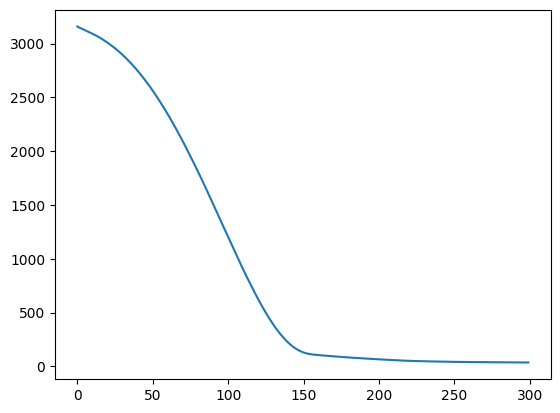

In [190]:
sns.lineplot(x = range(len(loss)), y = loss) 

In [192]:
trainLoss = model.evaluate(X_train, y_train, verbose = 0)
testLoss = model.evaluate(X_test, y_test, verbose = 0)

print(f"Train Loss:{trainLoss}")
print(f"Test Loss:{testLoss}")

Train Loss:35.47115707397461
Test Loss:31.36532974243164


In [193]:
prediction = model.predict(X_test)
print(f"Model Prediction:{prediction}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Model Prediction:[[42.104664]
 [31.374289]
 [47.289135]
 [64.47391 ]
 [32.959663]
 [33.71891 ]
 [87.26073 ]
 [41.10981 ]
 [29.34348 ]
 [35.998135]
 [38.003212]
 [62.600266]
 [39.54131 ]
 [33.381287]
 [72.79823 ]
 [64.48293 ]
 [74.784096]
 [46.800304]
 [39.53491 ]
 [93.478806]
 [45.26836 ]
 [44.234364]
 [39.535538]
 [34.92014 ]
 [75.22596 ]
 [30.677015]
 [45.505333]
 [51.47693 ]
 [36.200073]
 [38.423843]
 [32.508934]
 [71.430954]
 [37.378914]
 [35.39763 ]
 [43.4309  ]
 [45.21615 ]
 [37.982197]
 [31.464878]
 [32.834114]
 [22.80191 ]
 [47.96385 ]
 [44.05002 ]
 [64.1732  ]
 [42.362488]
 [32.44314 ]
 [31.284494]]


In [202]:
predictionDataFrame = pd.DataFrame(y_test, columns = ['True Value'])
predictionDataFrame

,True Value
0,37.48
1,27.05
2,48.24
3,71.74
4,30.18
5,30.89
6,94.86
7,48.45
8,28.31
9,34.47


In [203]:
predictionDataFrame['Prediction Value'] = prediction
predictionDataFrame

,True Value,Prediction Value
0,37.48,42.104664
1,27.05,31.374289
2,48.24,47.289135
3,71.74,64.473907
4,30.18,32.959663
5,30.89,33.718910
6,94.86,87.260727
7,48.45,41.109810
8,28.31,29.343479
9,34.47,35.998135


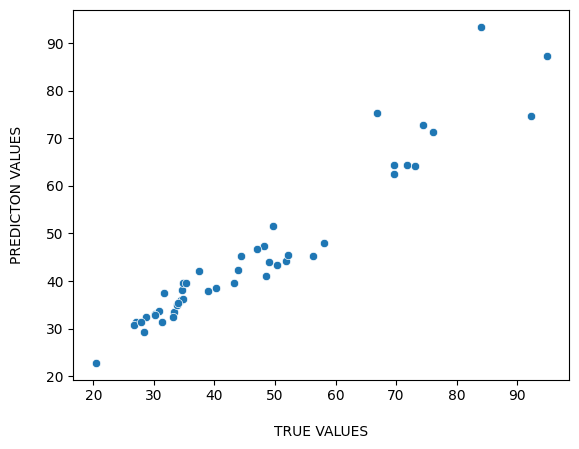

In [222]:
sns.scatterplot(x = predictionDataFrame['True Value'].values, y = predictionDataFrame['Prediction Value'].values , data = predictionDataFrame)
plt.xlabel("\nTRUE VALUES")
plt.ylabel("PREDICTON VALUES\n")

plt.show()

In [223]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [226]:
print("Mean Squared Error:", mean_squared_error(predictionDataFrame['True Value'], predictionDataFrame['Prediction Value']))
print("Mean Absolute Error:", mean_absolute_error(predictionDataFrame['True Value'], predictionDataFrame['Prediction Value']))

Mean Squared Error: 31.36532947381764
Mean Absolute Error: 4.357528164075768


In [228]:
predictionDataFrame.describe()

,True Value,Prediction Value
count,46.000000,46.000000
mean,46.807174,45.765854
std,18.793612,16.276577
min,20.370000,22.801910
25%,33.157500,34.019217
50%,41.685000,40.325560
75%,55.182500,47.795170
max,94.860000,93.478806


In [229]:
features = [[9.45, 26.78]]

In [233]:
new_features = scaler.transform(features)
new_features

array([[0.05851907, 0.06855178]])

In [234]:
model.predict(new_features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[33.25796]], dtype=float32)

In [238]:
from tensorflow.keras.models import load_model

In [239]:
model.save('Cost_Prediction.keras')

In [240]:
n = load_model('Cost_Prediction.keras')
n

<Sequential name=sequential_13, built=True>

In [241]:
n.predict(new_features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[33.25796]], dtype=float32)